# eLabFTW - API workshop

This workshop focuses on how to use **JupyterNoteBook** to interact with the **eLabFTW** API, using python and the library [elabapi_python](https://github.com/elabftw/elabapi-python).

## 📑 Table of Contents
- [Introduction](#introduction)
- [Step 1: What is an API?](#step-1-what-is-an-api-)
- [Step 2: eLabFTW API specifications](#elabftw-api-specifications)
- [Step 3: Try it out!](#step-3-try-it-out)
- [Conclusion](#conclusion)

## Introduction

This workshop is designed for beginners and will cover fundamental interactions with the eLabFTW API using the elabapi_python library. Participants will learn how to authenticate, retrieve, create, update, and delete experiments through API calls. The workshop emphasizes practical, beginner-friendly examples, making it suitable even for those new to REST APIs and Python programming. By the end, attendees will gain confidence in using eLabFTW's API to automate their lab workflows.

## Step 1: What is an API ?

**API (Application Programming Interface)**: A set of rules that allows different software applications to communicate with each other.

**REST (Representational State Transfer)**: A style of web API design that uses standard HTTP methods (GET, POST, PUT, DELETE) for communication.

Here are key points to be identified : 

- There is a client / server architecture. You are the client and the instance of eLabFTW is the server.
- Stateless client / server communication. There is nothing stored between requests
- The interface is uniform.
- 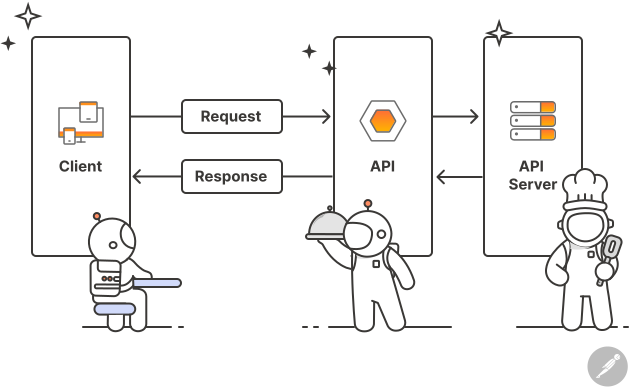


## Conclusion


## Step 2: eLabFTW API specifications

- Available at `/api/v2/`
- Tools to access it:
  - Your browser (only GET requests)
  - Curl (command-line tool)
  - Anything able to make an HTTP request (virtually all programming languages such as Python, R, or Ruby)

- Uses HTTP verbs for different actions:
  - **Create** → `POST`
  - **Read** → `GET`
  - **Update** → `PATCH`
  - **Delete** → `DELETE`


/!\ add examples for each -- update actually let's do it when showin curl

In [1]:
! curl https://demo.elabftw.net/api/v2/

{"code":401,"message":"Unauthorized","description":"Authentication required"}

```bash
curl https://elabftw/api/v2/

> GET /api/v2/ HTTP/2
< HTTP/2 401
< content-type: application/json
{
  "code": 401,
  "message": "Unauthorized",
  "description": "Authentication required"
}


# Let’s try with an API key this time

In [3]:
! curl https://demo.elabftw.net/api/v2/ -H "Authorization: 2-fad8bf96df2847c4316aaa6438974444a165d62d8c64025be5a0c8fd5d28cb3426c1e7fa6eeb24b2c1132"

{"code":400,"message":"Bad Request","description":"Invalid endpoint: available endpoints: apikeys, batch, config, idps, idps_sources, import, info, experiments, exports, items, experiments_templates, items_types, event, events, extra_fields_keys, favtags, team_tags, teams, todolist, unfinished_steps, users"}

# Now try with an endpoint: /info

In [4]:
! curl https://demo.elabftw.net/api/v2/info -H "Authorization: 2-fad8bf96df2847c4316aaa6438974444a165d62d8c64025be5a0c8fd5d28cb3426c1e7fa6eeb24b2c1132"

{"elabftw_version":"5.1.15","elabftw_version_int":50115,"ts_balance":0,"ts_limit":0,"uploads_filesize_sum":28606,"uploads_filesize_sum_formatted":"27.94 KiB","all_users_count":8,"active_users_count":8,"items_count":178,"teams_count":4,"experiments_count":266,"experiments_timestamped_count":0,"entities_timestamped_count_last_30_days":0}

## HTTP Codes (responses codes to indicate the result of the operation)
Roughly:

- 200: all good, here is the response
- 201: resource created, nothing else to say (response is empty)
- 400: you messed up
- 50X: we messed up

## Creating an API key from the web UI

[Link to the demo](https://demo.elabftw.net/)

- log in
- settings
- 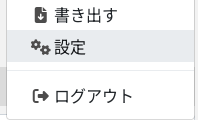
- 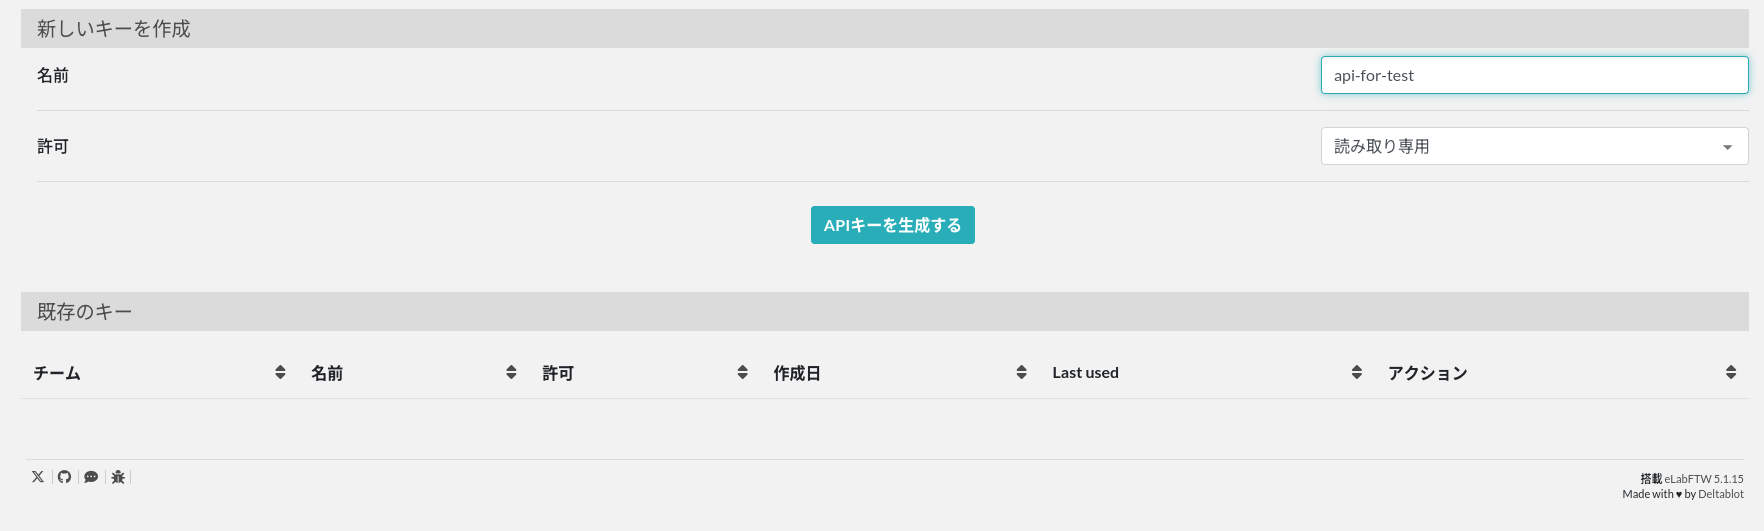

In [ ]:
2-fad8bf96df2.......24b2c1132

# Let’s try with an API key this time

## Step 3: Try it out!

### Use Python

In [55]:
import elabapi_python
# environment variables
import os

os.environ['API_HOST_URL'] = 'https://elab.local:3148/api/v2'
os.environ['API_KEY'] = 'apiKey4Test'

API_HOST_URL = os.getenv("API_HOST_URL") or sys.exit(
    "Missing ENV var: API_HOST_URL. Example: https://elab.example.org/api/v2"
)
API_KEY = os.getenv("API_KEY") or sys.exit(
    "Missing ENV var: API_KEY. Example: 3-86e9f9...3f6f2e3"
)

# config
configuration = elabapi_python.Configuration()
configuration.api_key["api_key"] = API_KEY
configuration.api_key_prefix["api_key"] = "Authorization"
configuration.host = API_HOST_URL
configuration.debug = False
# set to True if you have a proper certificate, here it is set to False to ease the test in dev
configuration.verify_ssl = False

# create an instance of the API class
api_client = elabapi_python.ApiClient(configuration)
# fix issue with Authorization header not being properly set by the generated lib
api_client.set_default_header(header_name="Authorization", header_value=API_KEY)


apiKey4Test


In [56]:
api_instance = elabapi_python.InfoApi(api_client)
api_instance.get_info()

/usr/lib/python3.13/site-packages/urllib3/connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'elab.local'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'active_users_count': 9,
 'all_users_count': 10,
 'elabftw_version': '5.2.0-alpha',
 'elabftw_version_int': 50200,
 'experiments_count': 316,
 'experiments_timestamped_count': 0,
 'items_count': 231,
 'teams_count': 4,
 'ts_balance': 0,
 'uploads_filesize_sum': 2079,
 'uploads_filesize_sum_formatted': '2.03 KiB'}

In [39]:
items = elabapi_python.ItemsApi(api_client)

In [ ]:
itemsList = items.get_item(12)
print(itemsList)

### Use curl

Try curl command to query to the API and get api keys

In [60]:
%env API_HOST_URL=https://elab.local:3148/api/v2

env: API_HOST_URL=https://elab.local:3148/api/v2


In [66]:
%env API_HOST_URL_DEMO=https://demo.elabftw.net/api/v2

env: API_HOST_URL_DEMO=https://demo.elabftw.net/api/v2


In [58]:
! echo $API_HOST_URL

https://elab.local:3148/api/v2


In [67]:
! curl -X 'GET' \
    $API_HOST_URL_DEMO'/apikeys' \
  -H 'accept: application/json' \
  -H 'Authorization: apiKey4Test'


No corresponding API key found!